# Validar hipóteses

In [ ]:
!pip install scipy pandas numpy


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
!pip install --upgrade google-cloud-bigquery


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.5/253.5 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-bigquery
    Found existing installation: google-cloud-bigquery 3.32.0
    Uninstalling google-cloud-bigquery-3.32.0:
      Successfully uninstalled google-cloud-bigquery-3.32.0


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery
import pandas as pd

In [ ]:
client = bigquery.Client(project='laboratoria-projeto2-457801')

In [ ]:
table_id = "laboratoria-projeto2-457801.projeto2.Tabela"
df = client.list_rows(table_id).to_dataframe()

In [ ]:
df.head()

,track_id,track_name,artists_name,artist_count,data,in_spotify_playlists,in_spotify_charts,streams,total_spotify,in_apple_playlists,...,bpm,danceability__,valence__,energy__,acousticness__,instrumentalness__,liveness__,speechiness__,quartil_streams,categoria_streams
0,2969049,AREA CODES,"KALIII, KALIII",2,2023-03-17,1197,13,113509496,1210,44,...,155,82,51,39,2,0,9,49,1,muito baixo
1,8917301,BAILE NO MORRO,"MC VITIN DA IGREJINHA, MC TAIRON, DJ WIN",3,2022-06-10,685,2,129314708,687,17,...,130,71,78,40,46,0,7,45,1,muito baixo
2,3476652,CALIFORNIA BREEZE,LIL BABY,1,2022-10-14,991,0,85559365,991,36,...,162,74,22,67,0,0,11,46,1,muito baixo
3,7762851,SAVIOR,"KENDRICK LAMAR, SAM DEW, BABY KEEM",3,2022-05-13,2291,0,86176890,2291,9,...,123,61,66,71,53,0,32,46,1,muito baixo
4,4165407,CARTO B,"MC CAVERINHA, KAYBLACK",2,2023-05-11,269,4,71573339,273,7,...,108,84,55,47,26,0,20,64,1,muito baixo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_id              949 non-null    object
 1   track_name            949 non-null    object
 2   artists_name          949 non-null    object
 3   artist_count          949 non-null    Int64 
 4   data                  949 non-null    dbdate
 5   in_spotify_playlists  949 non-null    Int64 
 6   in_spotify_charts     949 non-null    Int64 
 7   streams               949 non-null    Int64 
 8   total_spotify         949 non-null    Int64 
 9   in_apple_playlists    949 non-null    Int64 
 10  in_apple_charts       949 non-null    Int64 
 11  in_deezer_playlists   949 non-null    Int64 
 12  in_deezer_charts      949 non-null    Int64 
 13  in_shazam_charts      949 non-null    Int64 
 14  bpm                   949 non-null    Int64 
 15  danceability__        949 non-null    In

In [ ]:
# Dados
grupo_A = df["bpm"]
grupo_B = df["streams"]


# Teste t de Student para amostras independentes
t_stat, p_valor = stats.ttest_ind(grupo_A, grupo_B)

print("Estatística t:", t_stat)
print("Valor-p:", p_valor)

# Interpretação
if p_valor < 0.05:
    print("Rejeitamos a hipótese nula: as médias são significativamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula: as médias podem ser iguais.")


Estatística t: -27.91258208805929
Valor-p: 6.321139602810732e-144
Rejeitamos a hipótese nula: as médias são significativamente diferentes.


In [ ]:
# Dados
grupo_A = df["bpm"]
grupo_B = df["streams"]

# Teste de Wilcoxon (para dados pareados)
estatistica, p_valor = stats.wilcoxon(grupo_A, grupo_B)

print("Estatística de Wilcoxon:", estatistica)
print("Valor-p:", p_valor)

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula: há diferença significativa.")
else:
    print("Não rejeitamos a hipótese nula.")


Estatística de Wilcoxon: 0.0
Valor-p: 6.904268140678939e-157
Rejeitamos a hipótese nula: há diferença significativa.


# Marco 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [ ]:
X = df["bpm"]
Y = df["streams"]

In [ ]:
X = df["in_spotify_charts"]
Y = df["in_deezer_charts"]

In [ ]:
X = df["in_spotify_playlists"]
Y = df["streams"]

In [ ]:
X = df["danceability__"]
Y = df["streams"]

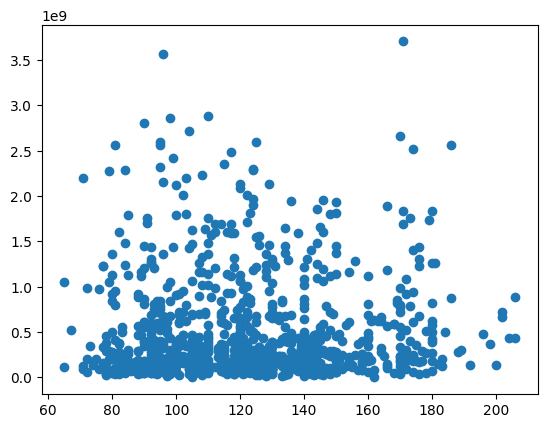

Coeficiente de correlação: PearsonRResult(statistic=np.float64(-0.002206160052233716), pvalue=np.float64(0.9458866276979015))


In [ ]:
plt.scatter(X, Y)
plt.show()

r = pearsonr(X, Y)
print(f'Coeficiente de correlação: {r}')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.3)

x_train = x_train.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)
x_test = x_test.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)
pred = reg.predict(x_test)

Text(0, 0.5, 'Streams')

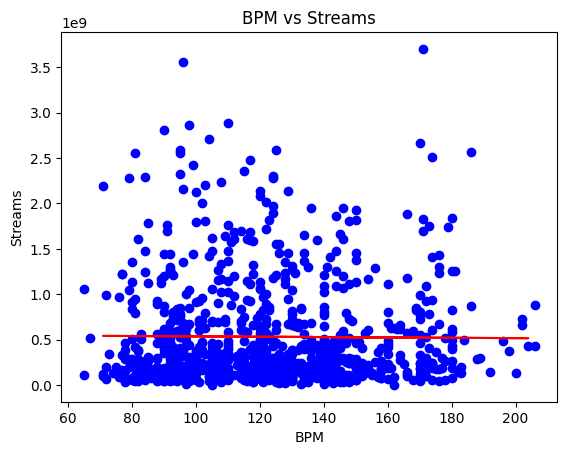

In [ ]:
plt.scatter(X, Y, color="blue")
plt.plot(x_test, pred, color="red")
plt.title("BPM vs Streams")
plt.xlabel("BPM")
plt.ylabel("Streams")

Text(0, 0.5, 'Deezer charts')

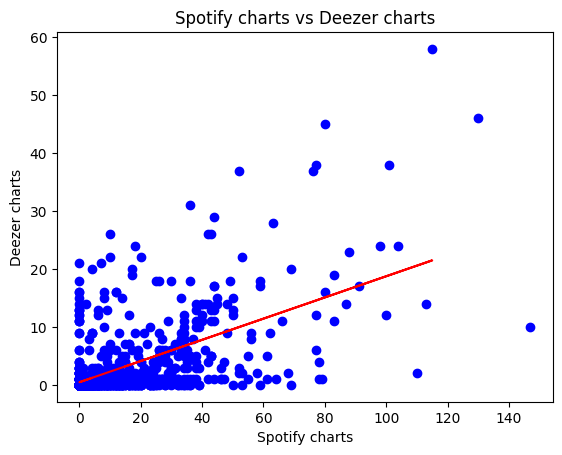

In [ ]:
plt.scatter(X, Y, color="blue")
plt.plot(x_test, pred, color="red")
plt.title("Spotify charts vs Deezer charts")
plt.xlabel("Spotify charts")
plt.ylabel("Deezer charts")

Text(0, 0.5, 'Streams')

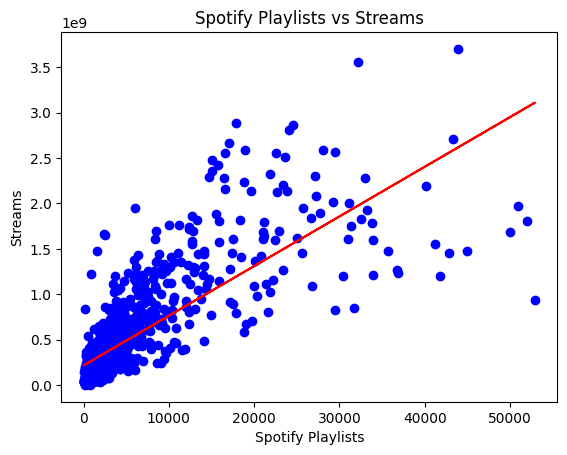

In [ ]:
plt.scatter(X, Y, color="blue")
plt.plot(x_test, pred, color="red")
plt.title("Spotify Playlists vs Streams")
plt.xlabel("Spotify Playlists")
plt.ylabel("Streams")

Text(0, 0.5, 'Streams')

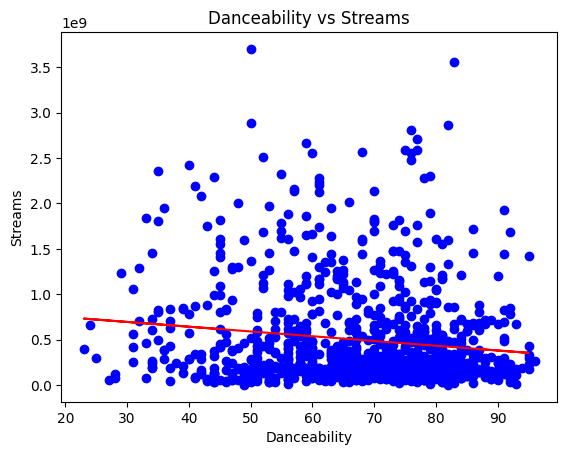

In [ ]:
plt.scatter(X, Y, color="blue")
plt.plot(x_test, pred, color="red")
plt.title("Danceability vs Streams")
plt.xlabel("Danceability")
plt.ylabel("Streams")

In [ ]:
r_squared = r2_score(y_test, pred)
print(f'Coeficiente r2: {r_squared}')

Coeficiente r2: -0.0106065909221571


### Fazendo um exemplo de um subgrupo por data de lançamento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [ ]:
table_id = "laboratoria-projeto2-457801.projeto2.Tabela"
df = client.list_rows(table_id).to_dataframe()

In [ ]:
df['data'] = pd.to_datetime(df['data'])

In [ ]:
df_ano = df[df['data'].dt.year >= 2023]

In [ ]:
X = df_ano["bpm"]
Y = df_ano["streams"]

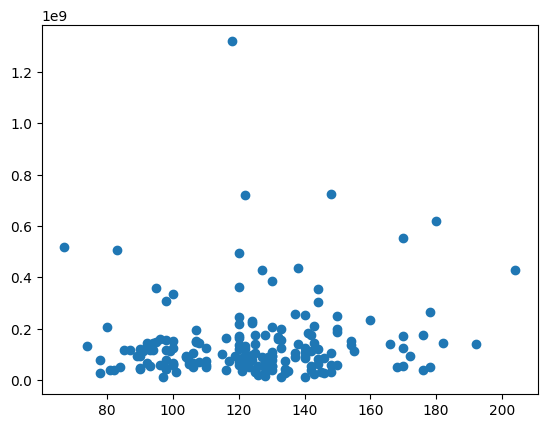

Coeficiente de correlação: PearsonRResult(statistic=np.float64(0.10527127480491491), pvalue=np.float64(0.1655992826195266))


In [ ]:
plt.scatter(X, Y)
plt.show()

r = pearsonr(X, Y)
print(f'Coeficiente de correlação: {r}')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.3)

x_train = x_train.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)
x_test = x_test.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)
pred = reg.predict(x_test)

Text(0, 0.5, 'Streams')

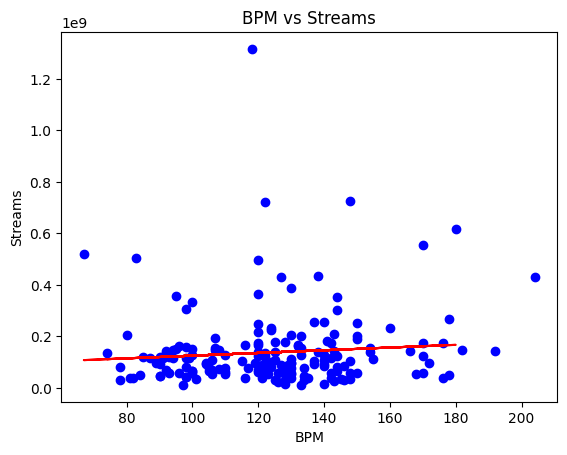

In [ ]:
plt.scatter(X, Y, color="blue")
plt.plot(x_test, pred, color="red")
plt.title("BPM vs Streams")
plt.xlabel("BPM")
plt.ylabel("Streams")

In [ ]:
r_squared = r2_score(y_test, pred)
print(f'Coeficiente r2: {r_squared}')

Coeficiente r2: -0.009529073502630547
